In [1]:
import networkit as nk
import networkx as nx
import girg_sampling.girgs as girgs
import matplotlib.pyplot as plt
import numpy as np

from benji_girgs import *

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import re
import glob
from tqdm import tqdm
import os

<Figure size 1200x600 with 0 Axes>

Calculating best minimal value for power law fit
powerlaw alpha: 2.483


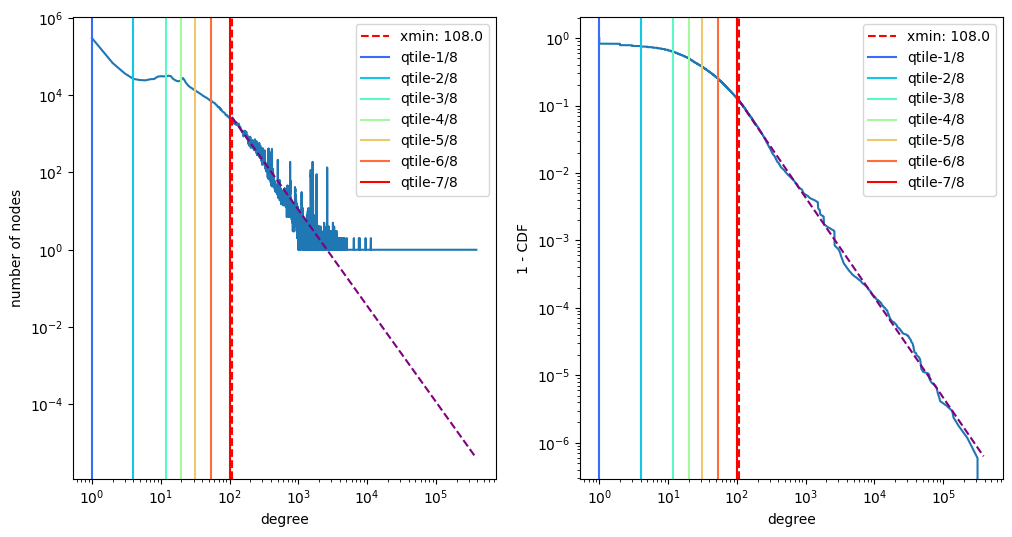

In [2]:
path = '../nemo-eva/data/out.wikipedia_link_pl'
wikipl = nk.readGraph(path, nk.Format.EdgeListTabOne)
plt.figure(figsize=(12, 6))
plot_degree_dist(wikipl, vlines=8, pl_fit=True)

<Figure size 1200x600 with 0 Axes>

Calculating best minimal value for power law fit
powerlaw alpha: 2.753


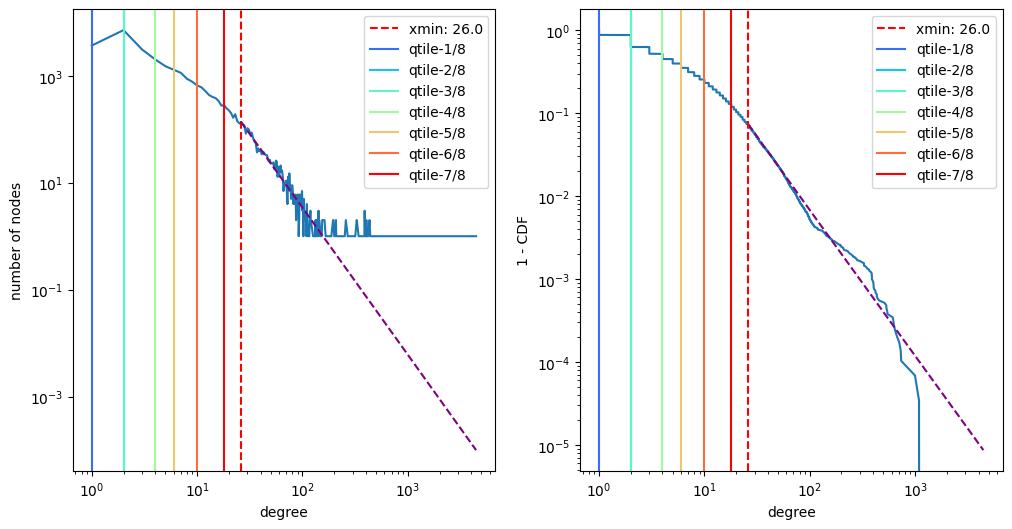

In [2]:
path = '../nemo-eva/data/out.wikipedia_link_wa'
wiki = nk.readGraph(path, nk.Format.EdgeListTabOne)
plt.figure(figsize=(12, 6))
plot_degree_dist(wiki, vlines=8, pl_fit=True)

In [3]:
fit_girg(wiki, 2, 2.753)

percs_true_median: 0.19047619047619047
0
alpha: 2.000, percs_median: 0.500
scaly_thing: 0.3
1
alpha: 1.700, percs_median: 0.429
scaly_thing: 0.27145122541078787
2
alpha: 1.510, percs_median: 0.333
scaly_thing: 0.24561922592339452
3
alpha: 1.385, percs_median: 0.267
scaly_thing: 0.22224546620451535
4
alpha: 1.299, percs_median: 0.200
scaly_thing: 0.20109601381069178
5
alpha: 1.239, percs_median: 0.167
scaly_thing: 0.18195919791379003
6
alpha: 1.292, percs_median: 0.200
scaly_thing: 0.16464349082820792
7
alpha: 1.244, percs_median: 0.167
scaly_thing: 0.14897559113742284
8
alpha: 1.287, percs_median: 0.200
scaly_thing: 0.13479868923516647
9
alpha: 1.248, percs_median: 0.173
scaly_thing: 0.12197089792217973


In [20]:
dd = sorted(nk.centrality.DegreeCentrality(wiki).run().scores(), reverse=True)
np.mean(dd)

9.699321181213604

In [3]:
n = wiki.numberOfNodes()
# n=8000
d=2
tau=2.783
alpha=4.0
wikigirg, edges, weights, pts = cgirg_gen(n, d, tau, alpha)
print(2*len(edges)/n)

12.354226249956927


In [4]:
nk.overview(wikigirg)

Network Properties:
nodes, edges			28988, 179266
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.000427
clustering coefficient		0.669384
min/max/avg degree		1, 2212, 12.368290
degree assortativity		0.132411
number of connected components	9
size of largest component	28972 (99.94 %)


In [7]:
wikigirg.numberOfNodes()

28998

In [12]:
nk.overview(wikigirg)

Network Properties:
nodes, edges			29021, 344354
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.000818
clustering coefficient		0.596590
min/max/avg degree		1, 4304, 23.731367
degree assortativity		0.031571
number of connected components	1
size of largest component	29021 (100.00 %)


In [6]:
def sample_edge_stuff(g, num_edges):
    cni = nk.linkprediction.CommonNeighborsIndex(g)

    edges = list(g.iterEdges())
    degrees = np.array([g.degree(node) for node in g.iterNodes()]).astype(np.int64)
    stuff = []
    lambdas = np.arange(0.1, 1.0, 0.1)
    for i in np.random.choice(len(edges), num_edges):
        a, b = edges[i]
        degs = [g.degree(a), g.degree(b)]
        if degs[0] > degs[1]:
            a, b = b, a

        a_nhbs = np.array(list(g.iterNeighbors(a)))
        b_nhbs = np.array(list(g.iterNeighbors(b)))
        a_weights = degrees[a_nhbs]
        lambda_intersects = []
        for l in lambdas:
            a_big_nhbs = a_nhbs[a_weights > degrees[a] * l]
            lambda_intersects.append(
                (l, 
                 len(set(b_nhbs).intersection(set(a_big_nhbs)))/len(a_big_nhbs)
                )
            )
        stuff.append((min(degs), max(degs), int(cni.run(a, b)), lambda_intersects))
        

    return stuff

def get_common_nb_percs(g, num_edges):
    stuff = sample_edge_stuff(g, num_edges)
    return [x[2]/x[0] for x in stuff]

In [8]:
nk.overview(wiki)

Network Properties:
nodes, edges			29021, 144830
directed?			False
weighted?			False
isolated nodes			0
self-loops			4088
density				0.000334
min/max/avg degree		1, 4448, 9.840185
degree assortativity		-0.049676
number of connected components	16
size of largest component	28982 (99.87 %)


In [14]:
desired_degree=9.8
scale = girgs.scaleWeights(weights, desired_degree, d, alpha)
weights = list(np.array(weights) * scale)
edges = girgs.generateEdges(weights, pts, alpha)
g = nk.nxadapter.nx2nk(nx.from_edgelist(edges))
nk.overview(g)

Network Properties:
nodes, edges			28735, 142211
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.000344
clustering coefficient		0.711862
min/max/avg degree		1, 11962, 9.898103
degree assortativity		-0.068617
number of connected components	60
size of largest component	28590 (99.50 %)


In [17]:
percs = get_common_nb_percs(g, 1000)
percs_true = get_common_nb_percs(wiki, 1000)

In [19]:
np.median(percs)
np.median(percs_true)

0.6666666666666666

0.1724137931034483

In [32]:
desired_degree=9.8
scale = girgs.scaleWeights(weights, np.mean(dd), d, alpha)
weights = list(np.array(weights) * scale)
edges = girgs.generateEdges(weights, pts, alpha)
g = nk.nxadapter.nx2nk(nx.from_edgelist(edges))
nk.overview(g)

Network Properties:
nodes, edges			28696, 140859
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.000342
clustering coefficient		0.709410
min/max/avg degree		1, 11800, 9.817326
degree assortativity		-0.067544
number of connected components	61
size of largest component	28543 (99.47 %)


In [34]:
alpha

4.0

In [30]:
np.mean(dd)

9.699321181213604

In [3]:
fit_girg(wiki, 2, 2.753)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/cluster/home/bdayan/girgs/venv/lib64/python3.8/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/scratch/tmp.12665413.bdayan/ipykernel_55318/2508603299.py", line 1, in <module>
    fit_girg(wiki, 2, 2.753)
  File "/cluster/home/bdayan/girgs/benji_src/benji_girgs.py", line 389, in fit_girg
    return [x[2]/x[0] for x in stuff]
  File "/cluster/home/bdayan/girgs/benji_src/benji_girgs.py", line 352, in get_common_nb_percs
    if degs[0] > degs[1]:
  File "/cluster/home/bdayan/girgs/benji_src/benji_girgs.py", line 325, in sample_edge_stuff
NameError: name 'pts' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/cluster/home/bdayan/girgs/venv/lib64/python3.8/site-packages/IPython/core/interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  F

In [3]:
alpha=1.23
weights = girgs.generateWeights(n, tau)
pts = girgs.generatePositions(n, d)
scale = girgs.scaleWeights(weights, desired_degree, d, alpha)
weights = list(np.array(weights) * scale)
edges = girgs.generateEdges(weights, pts, alpha)
g = nk.nxadapter.nx2nk(nx.from_edgelist(edges))

percs = get_common_nb_percs(g, 6000)
print(np.median(percs))

nk.overview(g)

NameError: name 'n' is not defined

In [80]:
nk.overview(wiki)

Network Properties:
nodes, edges			29021, 144830
directed?			False
weighted?			False
isolated nodes			0
self-loops			4088
density				0.000334
min/max/avg degree		1, 4448, 9.840185
degree assortativity		-0.049676
number of connected components	16
size of largest component	28982 (99.87 %)


In [48]:
(1 - 0.16)**(-1)

1.1904761904761905

In [ ]:
path = '../nemo-eva/data/wikipedia_link_ru/out.wikipedia_link_ru'
wikiru = nk.readGraph(path, nk.Format.EdgeListTabOne)
plt.figure(figsize=(12, 6))
plot_degree_dist(g, vlines=8, pl_fit=True)

In [28]:
path = '../nemo-eva/data/flickr-growth/out.flickr-growth'
g = nk.Graph()
with open(path) as file:
    pbar = tqdm()
    while line := file.readline():
        if str(line[0]) == '%':
            pass
        else:
            line = [x.strip() for x in line.split(' ')]
#             print(line)
            _ = g.addEdge(int(line[0]), int(line[1]), addMissing=True)
            
        _ = pbar.update(1)
pbar.close()
    


461606it [00:09, 47257.93it/s] 

14920it [00:00, 149184.49it/s]
29839it [00:00, 147558.81it/s]
50067it [00:00, 172395.04it/s]
70728it [00:00, 185851.95it/s]
90096it [00:00, 188667.63it/s]
109871it [00:00, 191750.79it/s]
129534it [00:00, 193341.76it/s]
150521it [00:00, 198598.64it/s]
170385it [00:00, 198119.26it/s]
190200it [00:01, 196384.79it/s]
210017it [00:01, 196926.81it/s]
229969it [00:01, 197709.16it/s]
251189it [00:01, 202082.68it/s]
271884it [00:01, 203547.66it/s]
292242it [00:01, 202590.70it/s]
312783it [00:01, 203434.89it/s]
333129it [00:01, 200989.12it/s]
354342it [00:01, 204300.91it/s]
374782it [00:01, 200621.29it/s]
394863it [00:02, 200302.60it/s]
416072it [00:02, 203789.57it/s]
436465it [00:02, 203818.51it/s]
457532it [00:02, 205860.17it/s]
478127it [00:02, 205055.98it/s]
498639it [00:02, 204328.08it/s]
519146it [00:02, 204549.05it/s]
539605it [00:02, 202733.33it/s]
559884it [00:02, 195365.33it/s]
580272it [00:02, 197834.35it/s]
600711it [00:03, 199755.17it/s]
620724it [0

<Figure size 1200x600 with 0 Axes>

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
powerlaw alpha: 1.742


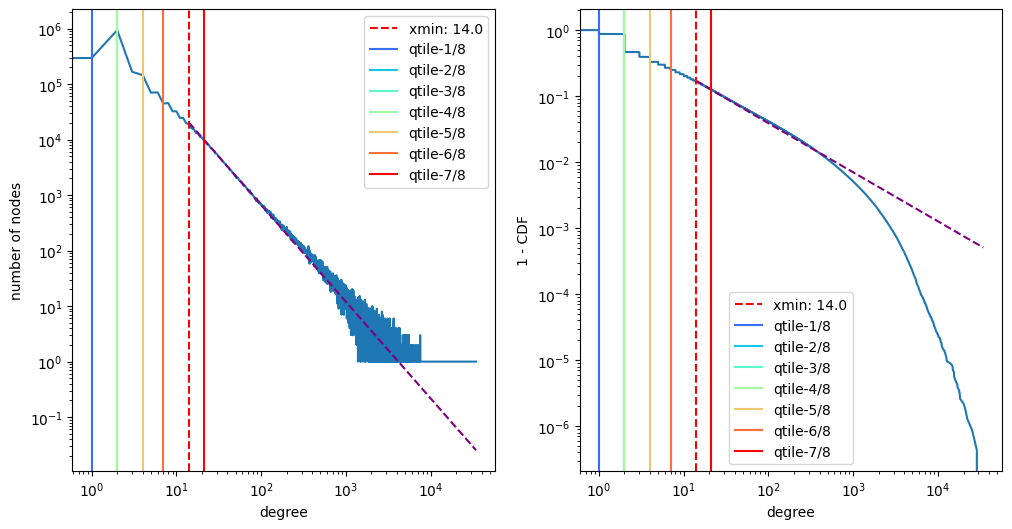

In [29]:
plt.figure(figsize=(12, 6))
plot_degree_dist(g, vlines=8, pl_fit=True)

<Figure size 1200x600 with 0 Axes>

Calculating best minimal value for power law fit
powerlaw alpha: 5.669


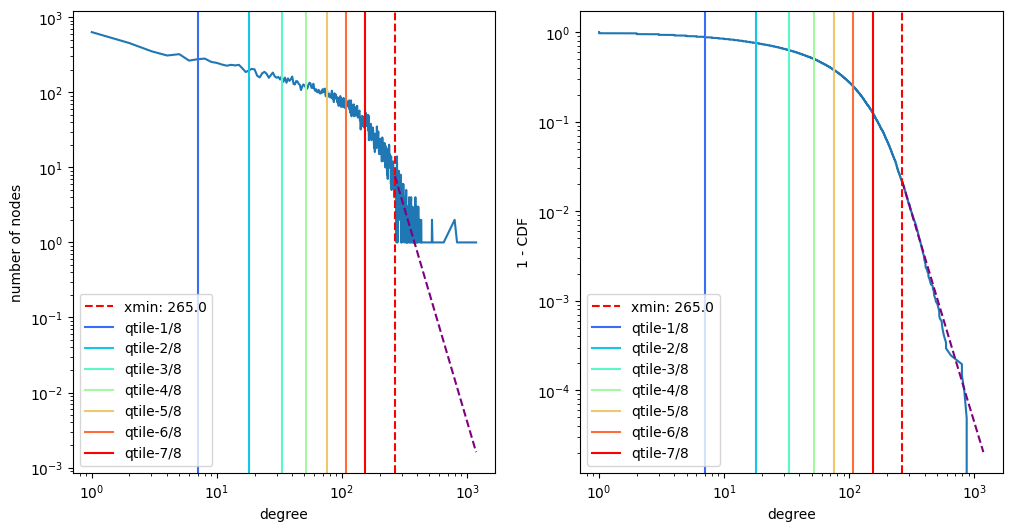

In [33]:
ucla = nk.readGraph(socfb_paths['UCLA'], nk.Format.EdgeListSpaceOne)
plt.figure(figsize=(12, 6))
plot_degree_dist(ucla, vlines=8, pl_fit=True)

41536


<Figure size 1200x600 with 0 Axes>

Calculating best minimal value for power law fit
powerlaw alpha: 4.160


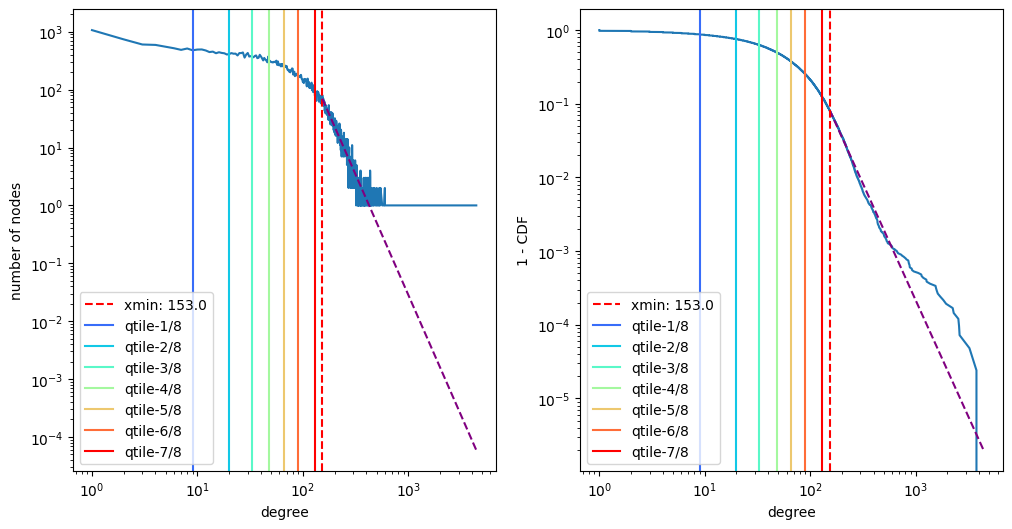

In [35]:
penn = nk.readGraph(socfb_paths['Penn94'], nk.Format.EdgeListSpaceOne)
print(penn.numberOfNodes())
plt.figure(figsize=(12, 6))
plot_degree_dist(penn, vlines=8, pl_fit=True)

In [12]:
g.addEdge(1, 3, addMissing=True)

In [14]:
nk.overview(g)

Network Properties:
nodes, edges			4, 1
directed?			False
weighted?			False
isolated nodes			2
self-loops			0
density				0.166667
clustering coefficient		0.000000
min/max/avg degree		0, 1, 0.500000
degree assortativity		nan
number of connected components	3
size of largest component	2 (50.00 %)


In [15]:
list(g.iterNodes())

[0, 1, 2, 3]

In [ ]:
g 

In [2]:
graph_folder = '../nemo-eva/data/socfb/'
path = graph_folder + 'socfb-Brown11.SpaceOne'
g = nk.readGraph(path, nk.Format.EdgeListSpaceOne)

data_dir = '/Users/benjidayan/Documents/GIRG_data/'

In [3]:
nk.overview(g)

Network Properties:
nodes, edges			8600, 384526
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.010399
clustering coefficient		0.217382
min/max/avg degree		1, 1075, 89.424651
degree assortativity		0.069552
number of connected components	8
size of largest component	8586 (99.84 %)


In [32]:
import re

socfb_paths = glob.glob('../nemo-eva/data/socfb/' + '*.SpaceOne')
socfb_paths = {re.match('.*socfb-(.*)[.]SpaceOne', x).group(1): x for x in socfb_paths}

In [32]:
ucla = nk.readGraph(socfb_paths['UCLA'], nk.Format.EdgeListSpaceOne)
dd = sorted(nk.centrality.DegreeCentrality(ucla).run().scores(), reverse=True)
degrees, numberOfNodes = np.unique(dd, return_counts=True)
degrees = degrees.astype(np.int64)

In [31]:
from pathlib import Path
path = Path(socfb_paths['UCLA'])

In [38]:
import powerlaw
fit = powerlaw.Fit(dd)
fit.power_law.alpha

Calculating best minimal value for power law fit


5.710284686923003

In [27]:
new_path = path.parent / (path.stem + '_degree_counts.txt')
str(new_path)

'../nemo-eva/data/socfb/socfb-UCLA_degree_counts.txt'

In [43]:
from tqdm import tqdm

In [46]:
for path in tqdm(socfb_paths.values()):
    pp = Path(path)
    new_path = pp.parent / (pp.stem + '_degree_counts.txt')
    
    g = nk.readGraph(path, nk.Format.EdgeListSpaceOne)
    dd = sorted(nk.centrality.DegreeCentrality(g).run().scores(), reverse=True)
    degrees, numberOfNodes = np.unique(dd, return_counts=True)
    degrees = degrees.astype(np.int64)
    
    with open(str(new_path), 'w') as file:
        for deg, numNodes in zip(degrees, numberOfNodes):
            _ = file.write(str(deg) + ' ' + str(numNodes) + '\n')

100%|██████████| 108/108 [00:07<00:00, 14.39it/s]


In [47]:
socfb_paths

{'American75': '../nemo-eva/data/socfb/socfb-American75.SpaceOne',
 'Amherst41': '../nemo-eva/data/socfb/socfb-Amherst41.SpaceOne',
 'Auburn71': '../nemo-eva/data/socfb/socfb-Auburn71.SpaceOne',
 'BC17': '../nemo-eva/data/socfb/socfb-BC17.SpaceOne',
 'BU10': '../nemo-eva/data/socfb/socfb-BU10.SpaceOne',
 'Baylor93': '../nemo-eva/data/socfb/socfb-Baylor93.SpaceOne',
 'Bingham82': '../nemo-eva/data/socfb/socfb-Bingham82.SpaceOne',
 'Bowdoin47': '../nemo-eva/data/socfb/socfb-Bowdoin47.SpaceOne',
 'Brandeis99': '../nemo-eva/data/socfb/socfb-Brandeis99.SpaceOne',
 'Brown11': '../nemo-eva/data/socfb/socfb-Brown11.SpaceOne',
 'Bucknell39': '../nemo-eva/data/socfb/socfb-Bucknell39.SpaceOne',
 'CMU': '../nemo-eva/data/socfb/socfb-CMU.SpaceOne',
 'Cal65': '../nemo-eva/data/socfb/socfb-Cal65.SpaceOne',
 'Caltech36': '../nemo-eva/data/socfb/socfb-Caltech36.SpaceOne',
 'Carnegie49': '../nemo-eva/data/socfb/socfb-Carnegie49.SpaceOne',
 'Colgate88': '../nemo-eva/data/socfb/socfb-Colgate88.SpaceOne',


In [35]:
numberOfNodes[:5]

array([633, 452, 352, 309, 322])

In [30]:
degrees.astype(np.int64)

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
         56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
         78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
         89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
        100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
        111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
        122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
        133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
        144,  145,  146,  147,  148,  149,  150,  1

array([633, 452, 352, 309, 322, 264, 276, 281, 254, 246, 234, 226, 232,
       228, 232, 208, 186, 195, 205, 202, 166, 158, 179, 187, 176, 156,
       169, 183, 163, 156, 160, 148, 164, 138, 157, 134, 153, 142, 149,
       162, 129, 127, 141, 140, 130, 126, 107, 118, 127, 124, 118, 110,
       114, 127, 134, 131, 115, 114, 130, 111, 105, 110, 101, 100, 108,
        99,  96, 103,  98, 110, 100, 109, 112,  89,  88, 105,  87,  90,
        96,  87,  85,  91, 105,  82,  93,  74,  97,  87,  94,  81,  87,
        73,  83,  66,  85,  84,  89,  64,  83,  75,  64,  66,  84,  72,
        62,  75,  67,  75,  77,  65,  65,  67,  66,  78,  59,  74,  53,
        78,  48,  56,  68,  60,  52,  69,  48,  62,  61,  49,  63,  64,
        49,  66,  55,  46,  47,  53,  55,  57,  42,  41,  32,  38,  42,
        48,  36,  48,  45,  43,  35,  40,  39,  33,  40,  54,  46,  36,
        38,  39,  37,  35,  50,  31,  49,  23,  25,  29,  28,  33,  35,
        38,  26,  23,  27,  30,  31,  34,  32,  28,  25,  20,  1

<Figure size 1000x500 with 0 Axes>

Calculating best minimal value for power law fit
powerlaw alpha: 7.302


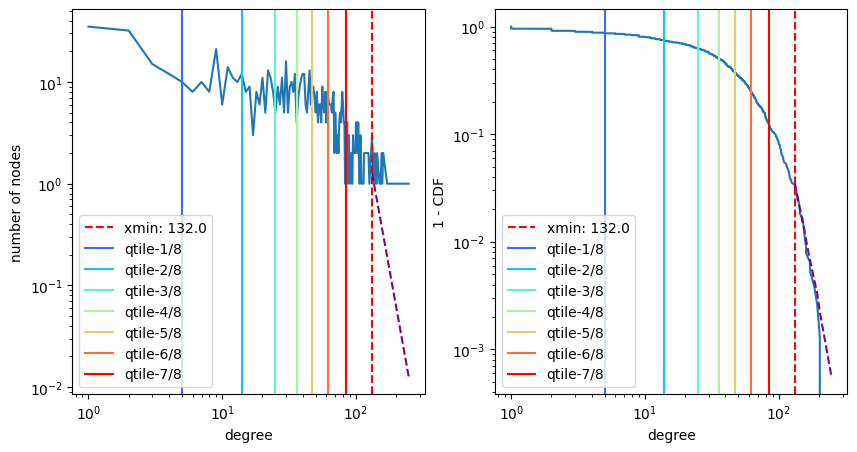

In [51]:
g = nk.readGraph(socfb_paths['Caltech36'], nk.Format.EdgeListSpaceOne)
plt.figure(figsize=(10, 5))
plot_degree_dist(g, vlines=8, pl_fit=True)

<Figure size 1000x500 with 0 Axes>

Calculating best minimal value for power law fit
powerlaw alpha: 4.849


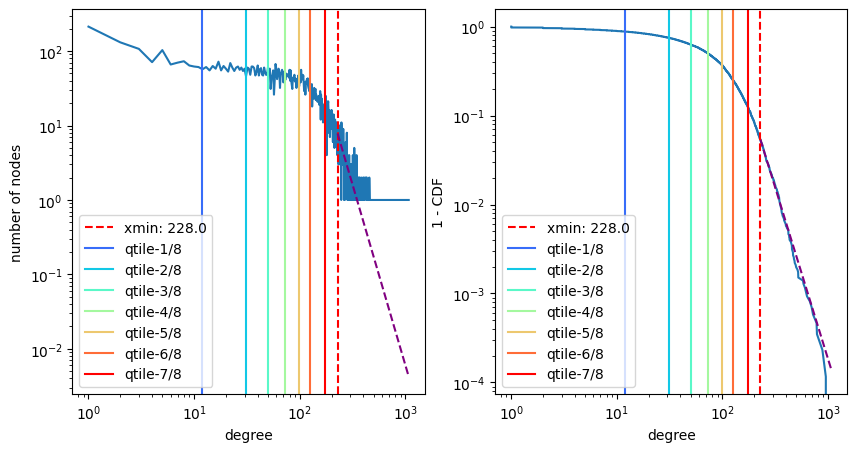

In [50]:
g = nk.readGraph(socfb_paths['Brown11'], nk.Format.EdgeListSpaceOne)
plt.figure(figsize=(10, 5))
plot_degree_dist(g, vlines=8, pl_fit=True)

In [9]:
fit.power_law.alpha
fit.power_law.sigma
fit.distribution_compare('power_law', 'exponential')

5.710284686923003

0.2250661081566465

(8.511172116456862, 0.18402454616072594)

Graph: Columbia2
total number of nodes: 11770
Calculating best minimal value for power law fit
powerlaw alpha: 4.288


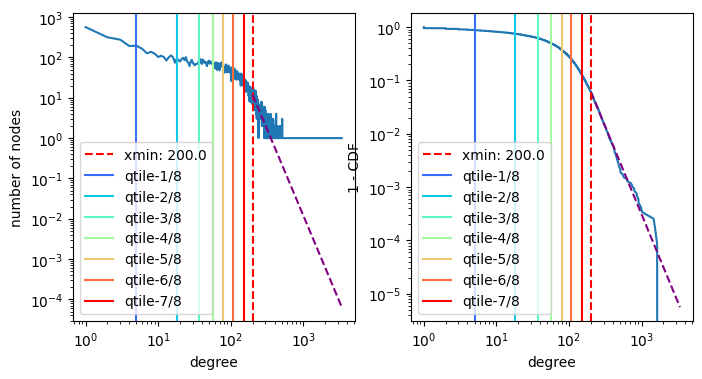

Graph: Caltech36
total number of nodes: 769
Calculating best minimal value for power law fit
powerlaw alpha: 7.302


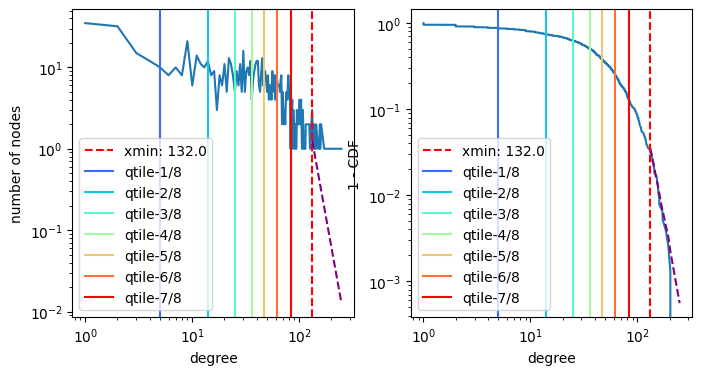

Graph: Brown11
total number of nodes: 8600
Calculating best minimal value for power law fit
powerlaw alpha: 4.849


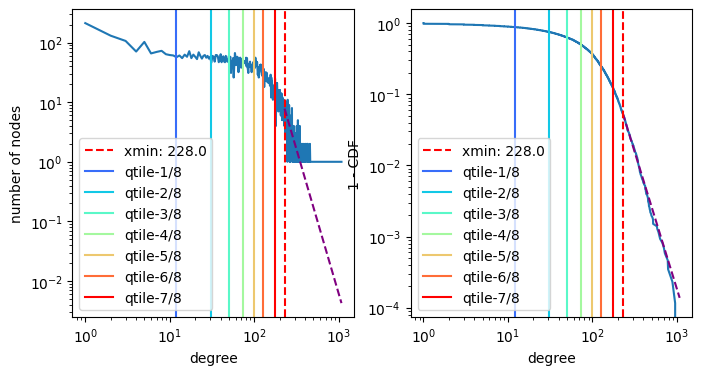

Graph: UCLA
total number of nodes: 20453
Calculating best minimal value for power law fit
powerlaw alpha: 5.669


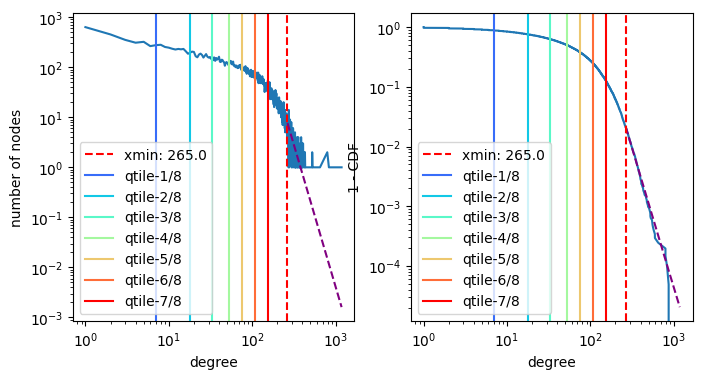

In [54]:
for key in reversed(['UCLA', 'Brown11', 'Caltech36', 'Columbia2']):
    g = nk.readGraph(socfb_paths[key], nk.Format.EdgeListSpaceOne)
    print(f'Graph: {key}')
    print(f'total number of nodes: {g.numberOfNodes()}')
    _ = plt.figure(figsize=(8, 4))
    plot_degree_dist(g, pl_fit=True, vlines=8)
    plt.show()

<Figure size 1600x800 with 0 Axes>

Calculating best minimal value for power law fit
powerlaw alpha: 5.669


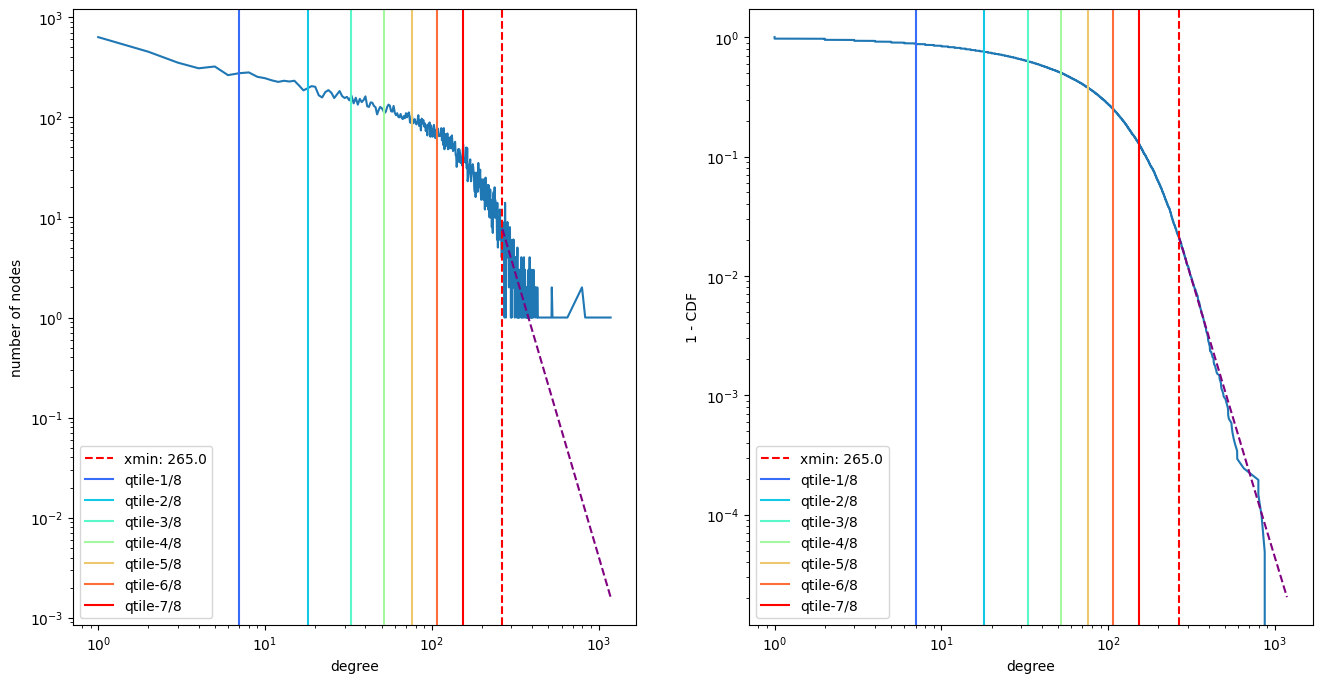

In [59]:
plt.figure(figsize=(16, 8))
plot_degree_dist(ucla, vlines=8, pl_fit=True)

Graph: JohnsHopkins55
total number of nodes: 5180


<Figure size 1600x800 with 0 Axes>

Calculating best minimal value for power law fit
powerlaw alpha: 5.567


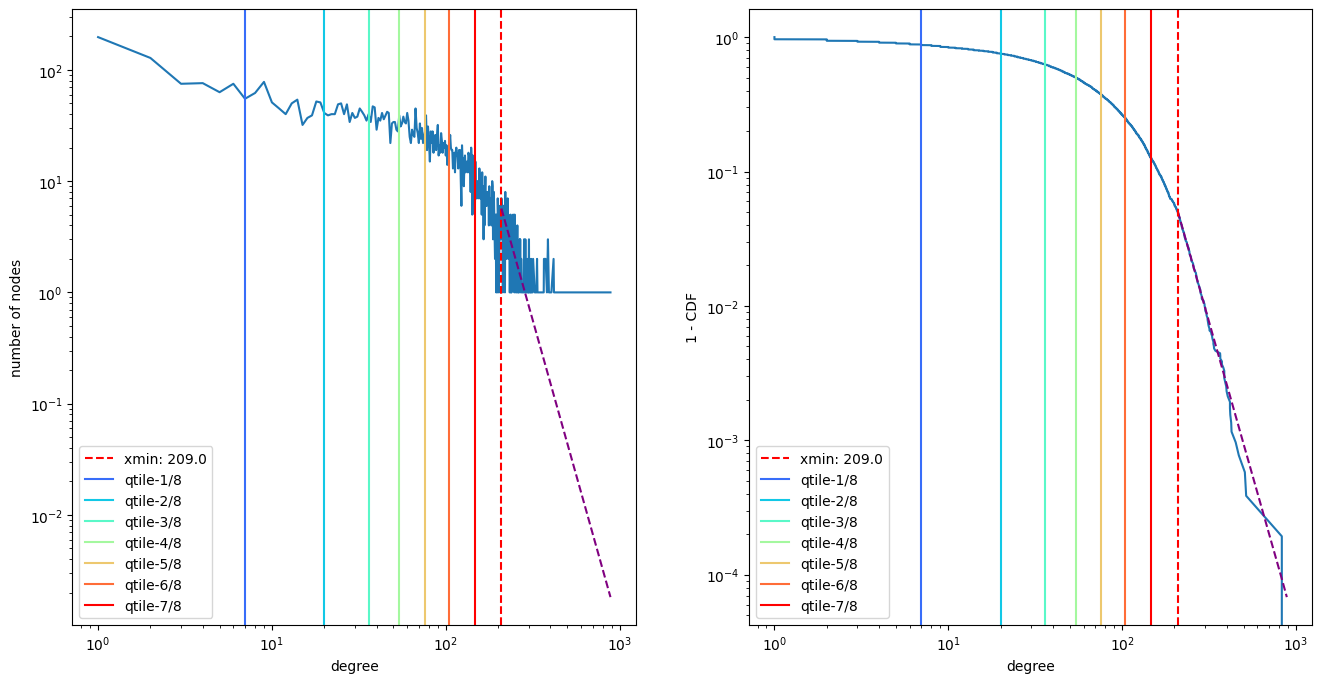

Graph: JohnsHopkins55
total number of nodes: 5180


<Figure size 1600x800 with 0 Axes>

Calculating best minimal value for power law fit
powerlaw alpha: 5.567


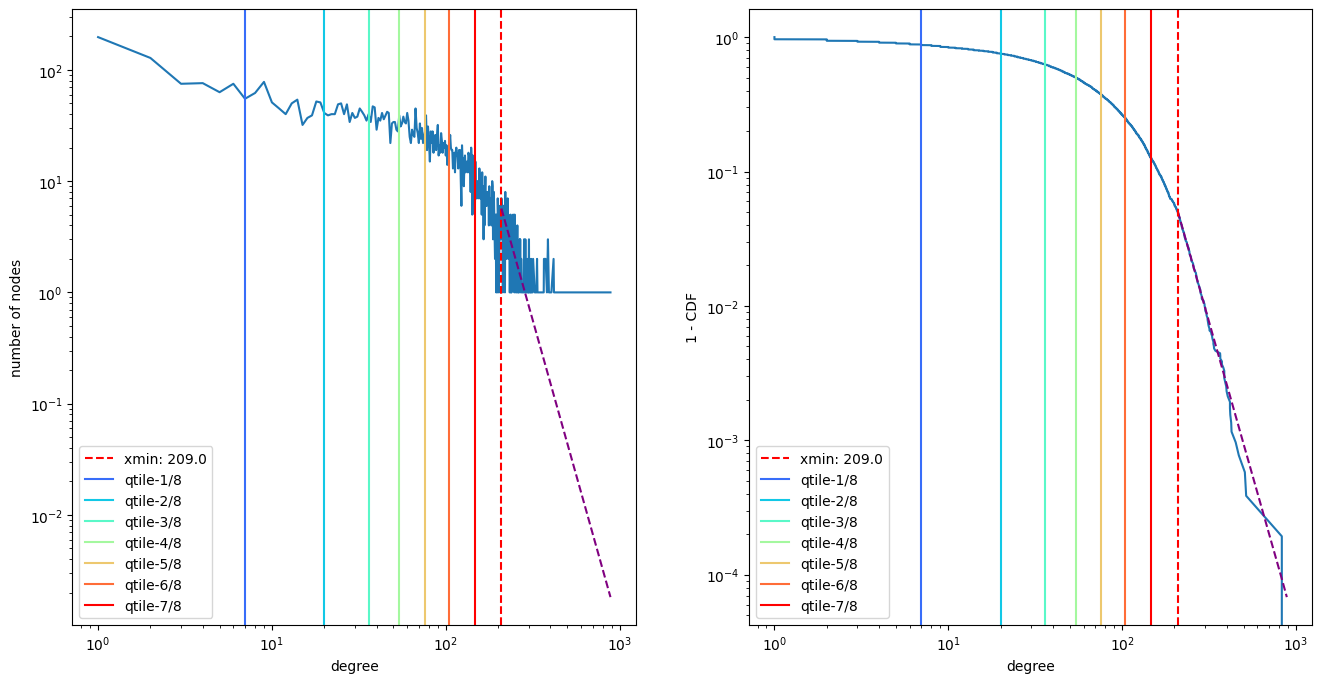

Graph: Pepperdine86
total number of nodes: 3445


<Figure size 1600x800 with 0 Axes>

Calculating best minimal value for power law fit
powerlaw alpha: 5.273


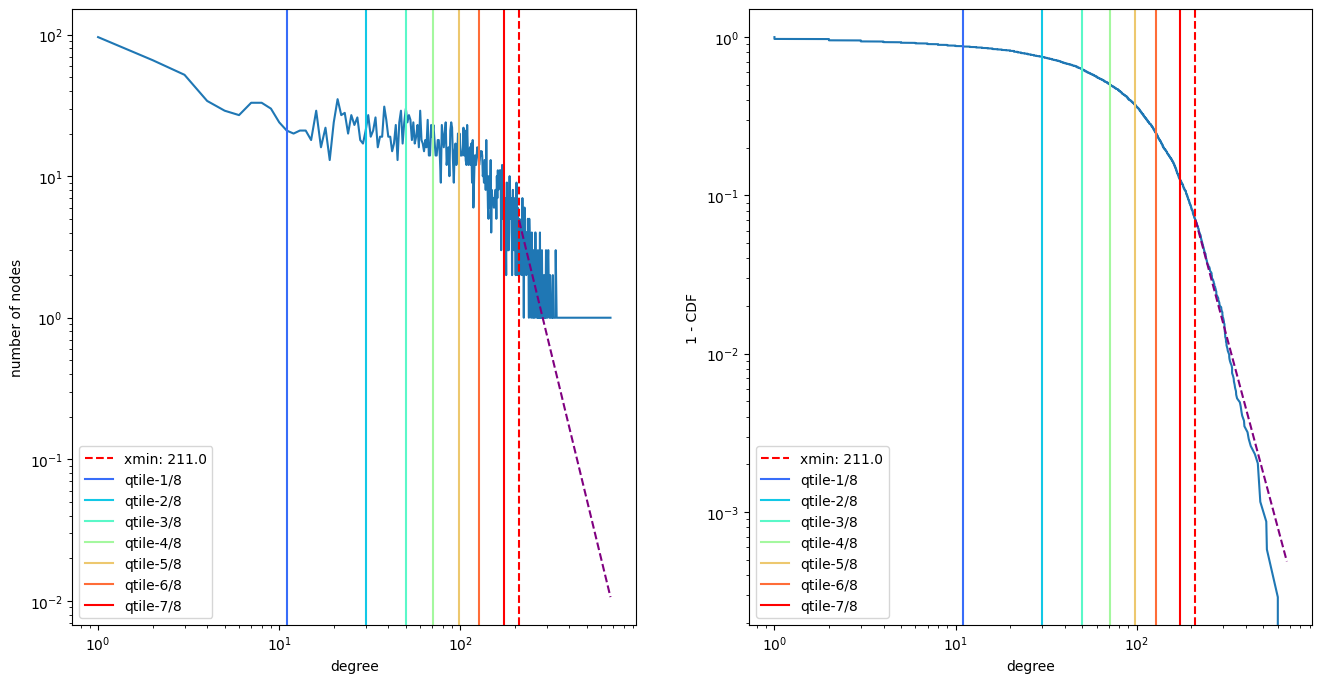

Graph: Maryland58
total number of nodes: 20871


<Figure size 1600x800 with 0 Axes>

Calculating best minimal value for power law fit
powerlaw alpha: 5.410


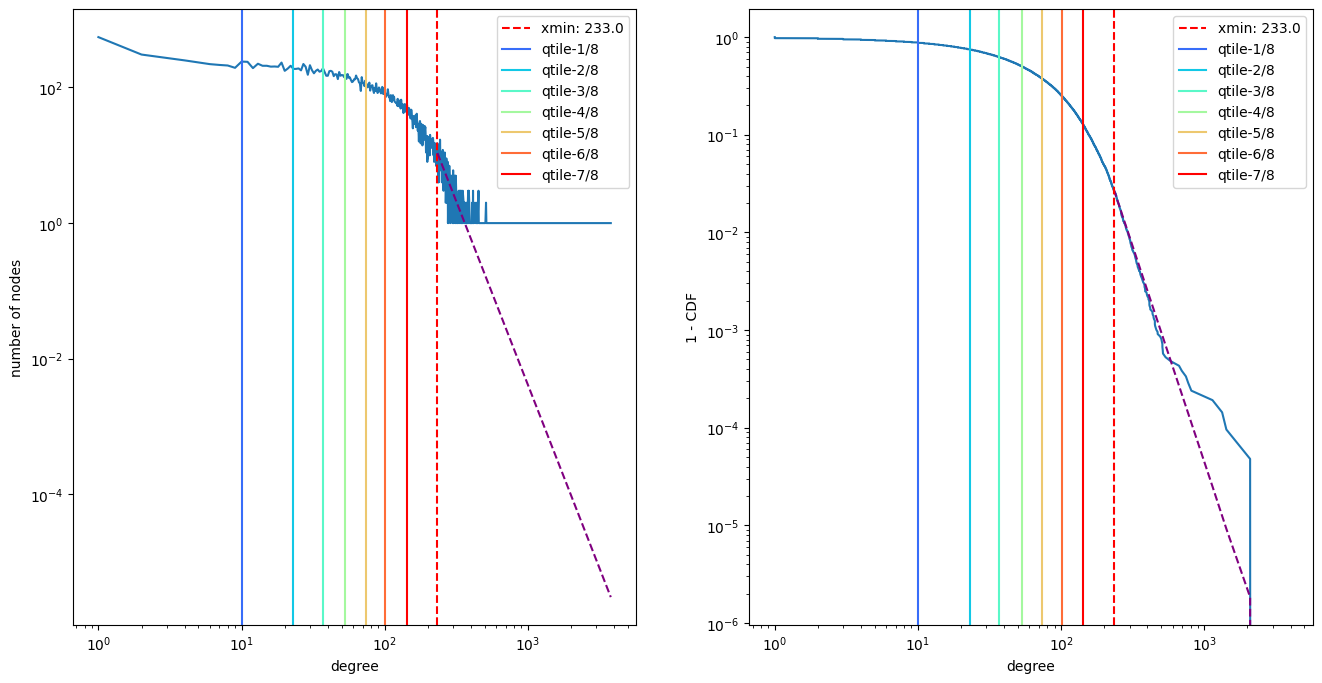

Graph: Tulane29
total number of nodes: 7752


<Figure size 1600x800 with 0 Axes>

Calculating best minimal value for power law fit
powerlaw alpha: 6.467


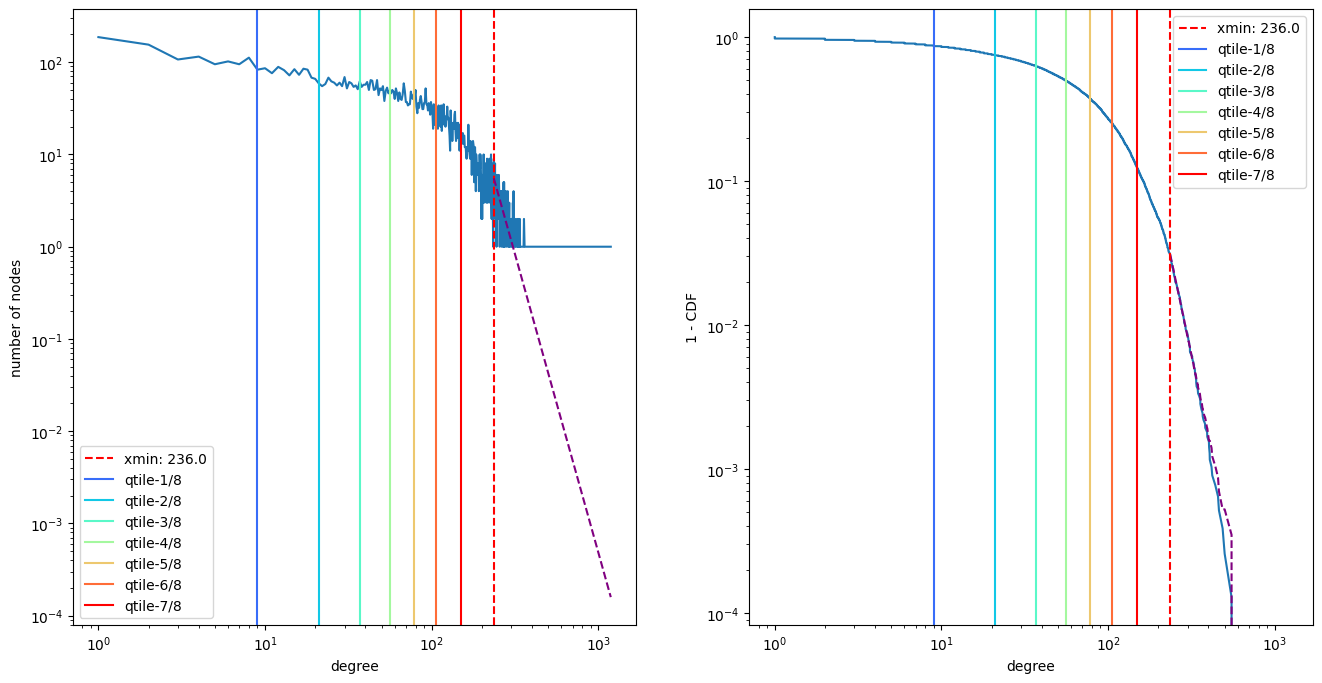

In [61]:
for key in np.random.choice(list(socfb_paths.keys()), 5):
    g = nk.readGraph(socfb_paths[key], nk.Format.EdgeListSpaceOne)
    print(f'Graph: {key}')
    print(f'total number of nodes: {g.numberOfNodes()}')
    plt.figure(figsize=(16,8))
    plot_degree_dist(g, pl_fit=True, vlines=8)
    plt.show()

In [64]:
ca_paths

{'AstroPh': '../nemo-eva/data/ca/ca-AstroPh.SpaceOne',
 'CondMat': '../nemo-eva/data/ca/ca-CondMat.SpaceOne',
 'Erdos992': '../nemo-eva/data/ca/ca-Erdos992.SpaceOne',
 'GrQc': '../nemo-eva/data/ca/ca-GrQc.SpaceOne',
 'HepPh': '../nemo-eva/data/ca/ca-HepPh.SpaceOne',
 'IMDB': '../nemo-eva/data/ca/ca-IMDB.SpaceOne',
 'MathSciNet': '../nemo-eva/data/ca/ca-MathSciNet.SpaceOne',
 'citeseer': '../nemo-eva/data/ca/ca-citeseer.SpaceOne',
 'coauthors-dblp': '../nemo-eva/data/ca/ca-coauthors-dblp.SpaceOne',
 'dblp-2010': '../nemo-eva/data/ca/ca-dblp-2010.SpaceOne',
 'dblp-2012': '../nemo-eva/data/ca/ca-dblp-2012.SpaceOne'}

Graph: IMDB
total number of nodes: 896308


<Figure size 1600x800 with 0 Axes>

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
powerlaw alpha: 3.786


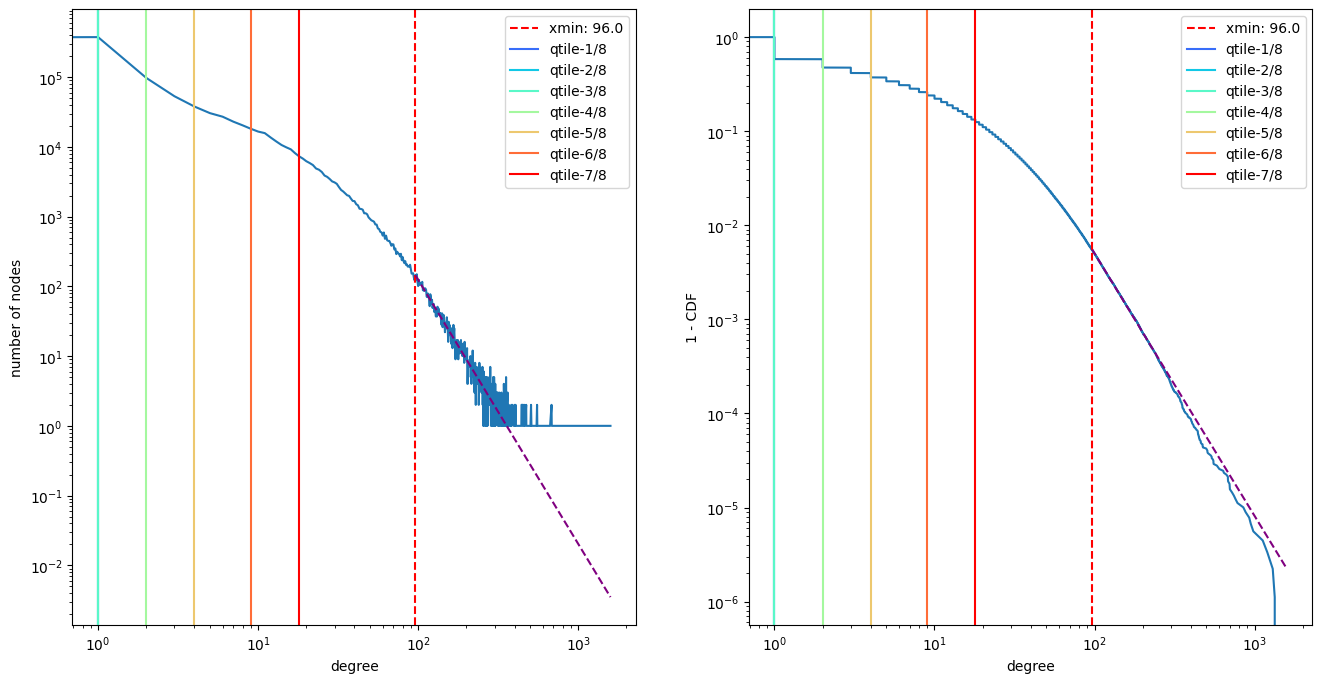

Graph: MathSciNet
total number of nodes: 332689


<Figure size 1600x800 with 0 Axes>

Calculating best minimal value for power law fit
powerlaw alpha: 5.032


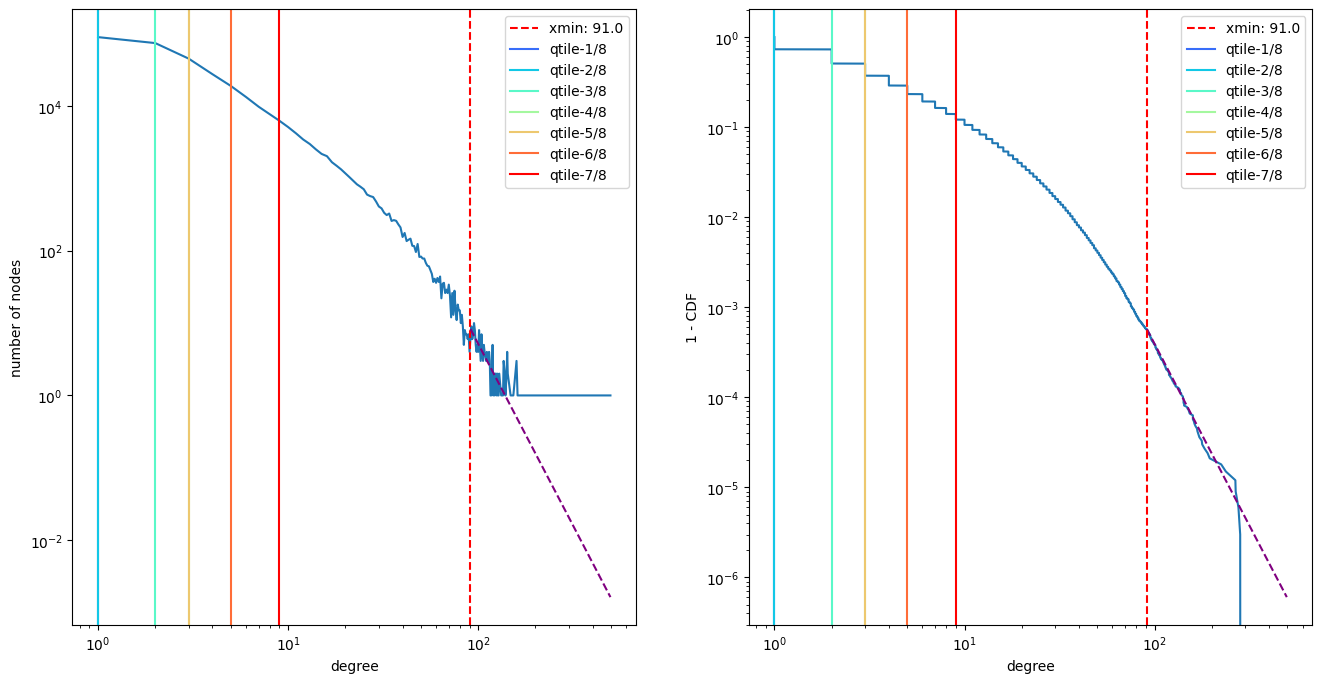

Graph: dblp-2012
total number of nodes: 317080


<Figure size 1600x800 with 0 Axes>

Calculating best minimal value for power law fit
powerlaw alpha: 3.261


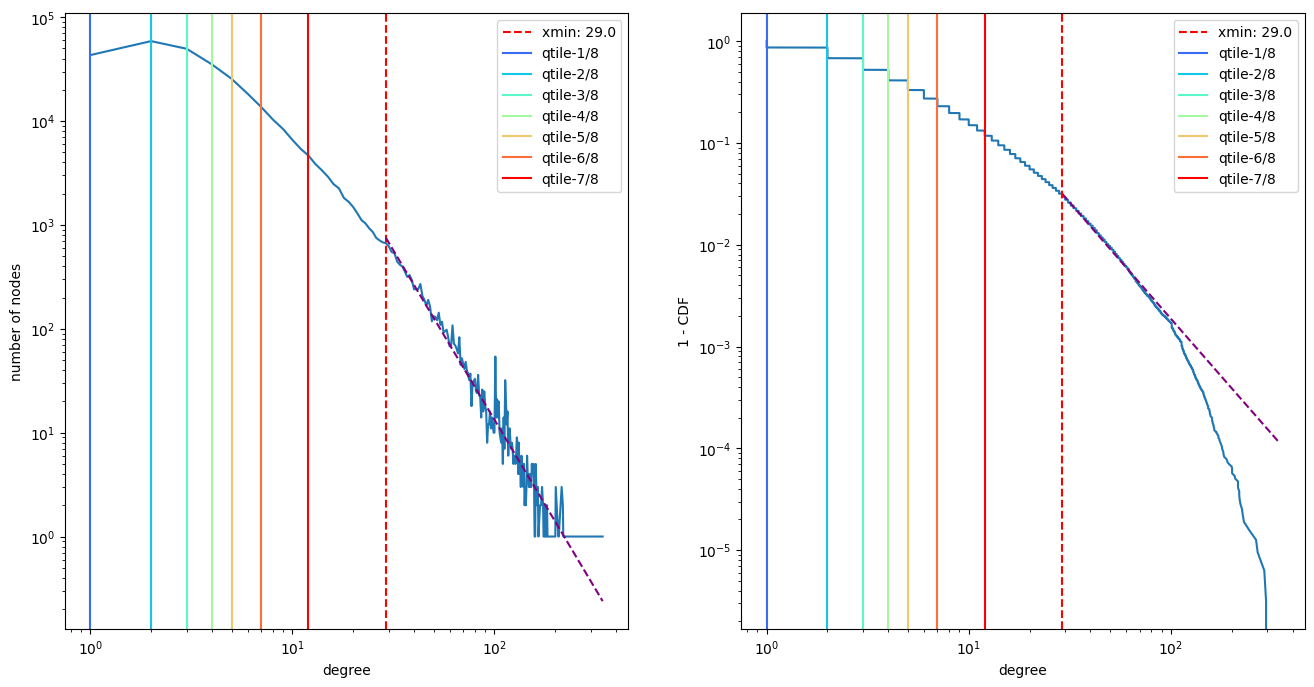

Graph: citeseer
total number of nodes: 227320


<Figure size 1600x800 with 0 Axes>

Calculating best minimal value for power law fit
powerlaw alpha: 3.127


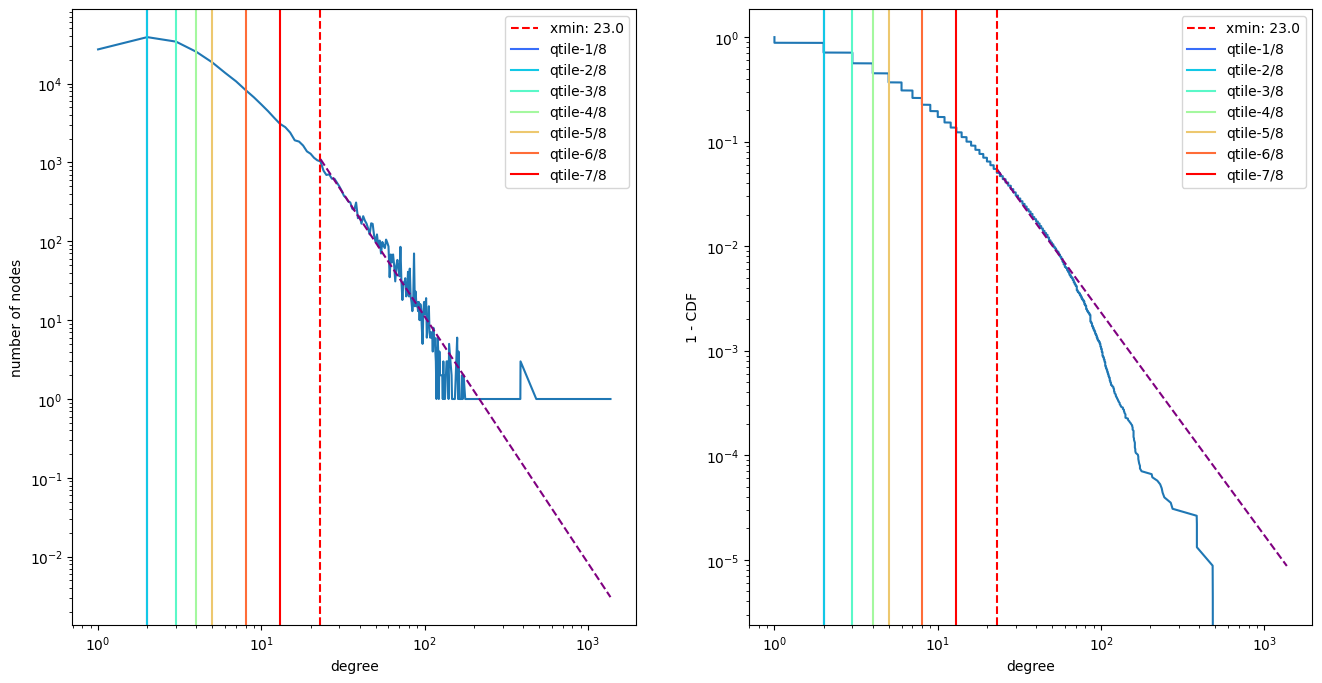

Graph: AstroPh
total number of nodes: 17903


<Figure size 1600x800 with 0 Axes>

Calculating best minimal value for power law fit
powerlaw alpha: 4.496


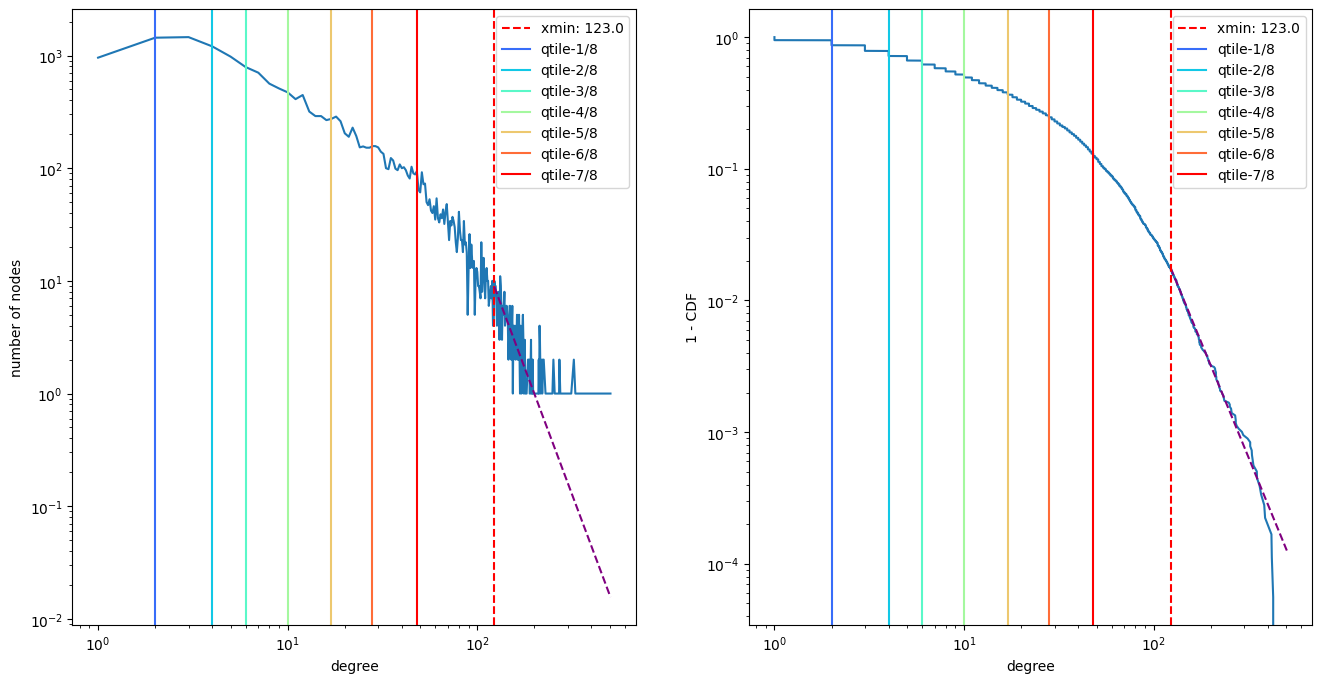

In [66]:
ca_paths = glob.glob('../nemo-eva/data/ca/' + '*.SpaceOne')
ca_paths = {re.match('.*ca-(.*)[.]SpaceOne', x).group(1): x for x in ca_paths}
for key in ['IMDB', 'MathSciNet', 'dblp-2012', 'citeseer', 'AstroPh']:
    g = nk.readGraph(ca_paths[key], nk.Format.EdgeListSpaceOne)
    print(f'Graph: {key}')
    print(f'total number of nodes: {g.numberOfNodes()}')
    plt.figure(figsize=(16,8))
    plot_degree_dist(g, pl_fit=True, vlines=8)
    plt.show()

In [5]:
import glob
import re

{'fly-drosophila_medulla_1': '../nemo-eva/data/bn/bn-fly-drosophila_medulla_1.SpaceZero',
 'macaque-rhesus_brain_1': '../nemo-eva/data/bn/bn-macaque-rhesus_brain_1.SpaceZero'}

Graph: fly-drosophila_medulla_1
total number of nodes: 1777


<Figure size 1600x800 with 0 Axes>

Calculating best minimal value for power law fit
powerlaw alpha: 3.998


Values less than or equal to 0 in data. Throwing out 0 or negative values


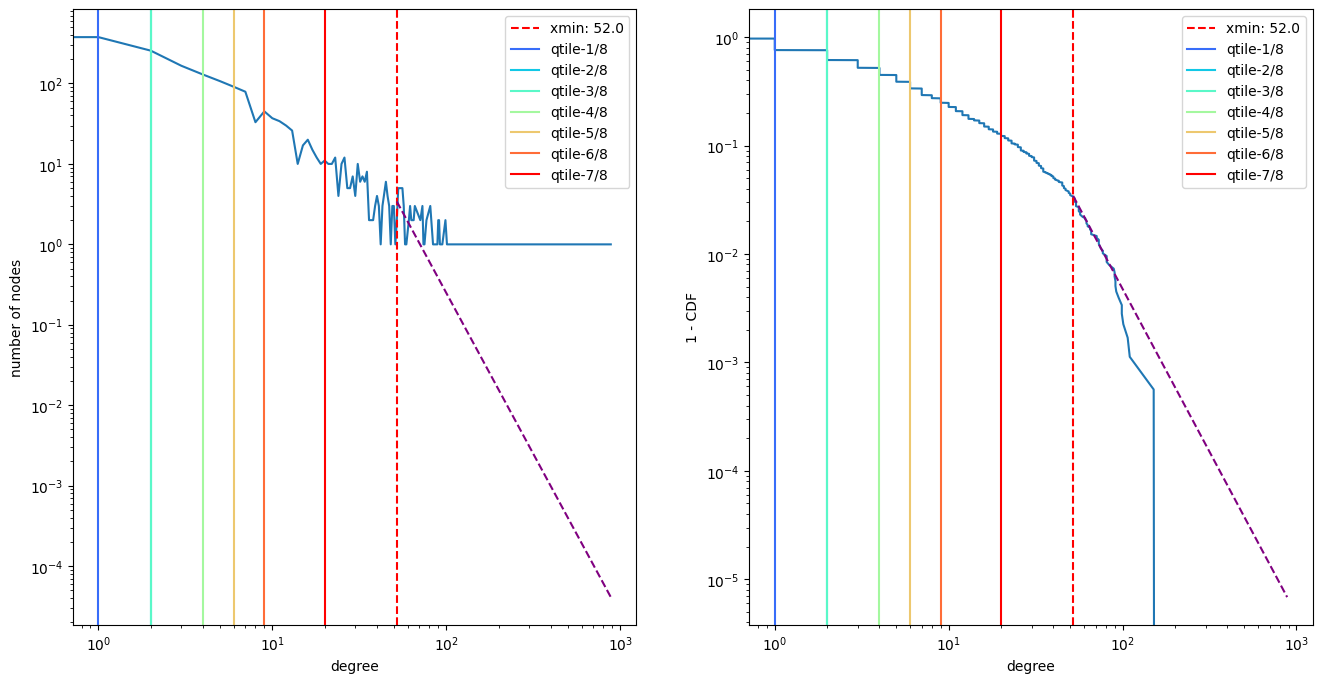

Graph: macaque-rhesus_brain_1
total number of nodes: 242


<Figure size 1600x800 with 0 Axes>

Calculating best minimal value for power law fit
powerlaw alpha: 4.396


Values less than or equal to 0 in data. Throwing out 0 or negative values


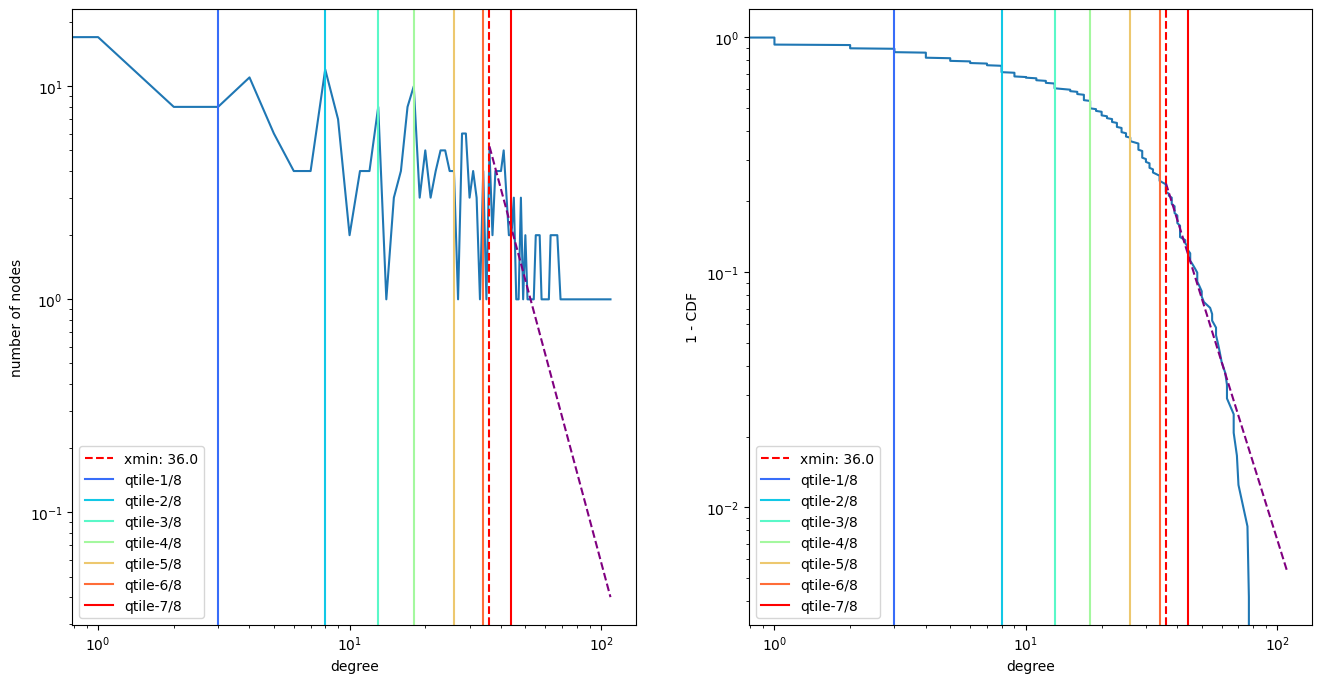

In [8]:
bn_paths = glob.glob('../nemo-eva/data/bn/' + '*.SpaceZero')
bn_paths = {re.match('.*bn-(.*)[.]SpaceZero', x).group(1): x for x in bn_paths}
bn_paths
for key in bn_paths:
    g = nk.readGraph(bn_paths[key], nk.Format.EdgeListSpaceZero)
    print(f'Graph: {key}')
    print(f'total number of nodes: {g.numberOfNodes()}')
    plt.figure(figsize=(16,8))
    plot_degree_dist(g, pl_fit=True, vlines=8)
    plt.show()

In [7]:
import os
os.stat(bn_paths['fly-drosophila_medulla_1'])

os.stat_result(st_mode=33188, st_ino=92221753, st_dev=47, st_nlink=1, st_uid=547593, st_gid=453253, st_size=278395, st_atime=1679136112, st_mtime=1677947599, st_ctime=1679136132)

In [ ]:
g = nk.readGraph('../nemo-eva/data/bn/bn-fly-drosophila_medulla_1.SpaceZero', nk.Format.EdgeListSpaceOne)

In [8]:
bn_paths['fly-drosophila_medulla_1']

'../nemo-eva/data/bn/bn-fly-drosophila_medulla_1.SpaceOne'

In [1]:
!which python

/cluster/apps/nss/gcc-6.3.0/python/3.8.5/x86_64/bin/python


In [6]:
!pip install in-place

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/cluster/apps/nss/gcc-6.3.0/python/3.8.5/x86_64/bin/python3.8 -m pip install --upgrade pip' command.


In [6]:
import tqdm

In [7]:
import in_place
from tqdm import tqdm

with in_place.InPlace(bn_paths['fly-drosophila_medulla_1']) as file:
    for line in tqdm(file):
        stuff = [x.strip() for x in line.split(' ')]
        stuff = [str(int(x) + 1) for x in stuff]
        line.write(stuff[0] + ' ' + stuff[1] + '\n')

NameError: name 'bn_paths' is not defined

In [12]:
line.split(' ')[1].strip()

'30'

In [16]:
bn_paths

{'fly-drosophila_medulla_1': '../nemo-eva/data/bn/bn-fly-drosophila_medulla_1.SpaceOne',
 'human-BNU_1_0025873_session_1-bg': '../nemo-eva/data/bn/bn-human-BNU_1_0025873_session_1-bg.SpaceOne',
 'human-BNU_1_0025889_session_2': '../nemo-eva/data/bn/bn-human-BNU_1_0025889_session_2.SpaceOne',
 'macaque-rhesus_brain_1': '../nemo-eva/data/bn/bn-macaque-rhesus_brain_1.SpaceOne'}

In [ ]:
with in_place.InPlace(bn_paths['human-BNU_1_0025873_session_1-bg']) as file:
    for line in tqdm(file):
        stuff = [x.strip() for x in line.split(' ')]
        stuff = [str(int(x) + 1) for x in stuff]
        file.write(stuff[0] + ' ' + stuff[1] + '\n')

105302710it [06:48, 267595.33it/s]

In [ ]:
with in_place.InPlace(bn_paths['human-BNU_1_0025889_session_2']) as file:
    for line in tqdm(file):
        stuff = [x.strip() for x in line.split(' ')]
        stuff = [str(int(x) + 1) for x in stuff]
        file.write(stuff[0] + ' ' + stuff[1] + '\n')

In [10]:
with in_place.InPlace(bn_paths['macaque-rhesus_brain_1']) as file:
    for line in tqdm(file):
        stuff = [x.strip() for x in line.split(' ')]
        stuff = [str(int(x) + 1) for x in stuff]
        file.write(stuff[0] + ' ' + stuff[1] + '\n')

3616it [00:00, 147760.72it/s]


In [83]:
glob.glob('../nemo-eva/data/ca/' + '*.SpaceOne')

['../nemo-eva/data/ca/ca-AstroPh.SpaceOne',
 '../nemo-eva/data/ca/ca-CondMat.SpaceOne',
 '../nemo-eva/data/ca/ca-Erdos992.SpaceOne',
 '../nemo-eva/data/ca/ca-GrQc.SpaceOne',
 '../nemo-eva/data/ca/ca-HepPh.SpaceOne',
 '../nemo-eva/data/ca/ca-IMDB.SpaceOne',
 '../nemo-eva/data/ca/ca-MathSciNet.SpaceOne',
 '../nemo-eva/data/ca/ca-citeseer.SpaceOne',
 '../nemo-eva/data/ca/ca-coauthors-dblp.SpaceOne',
 '../nemo-eva/data/ca/ca-dblp-2010.SpaceOne',
 '../nemo-eva/data/ca/ca-dblp-2012.SpaceOne']

<Axes: >

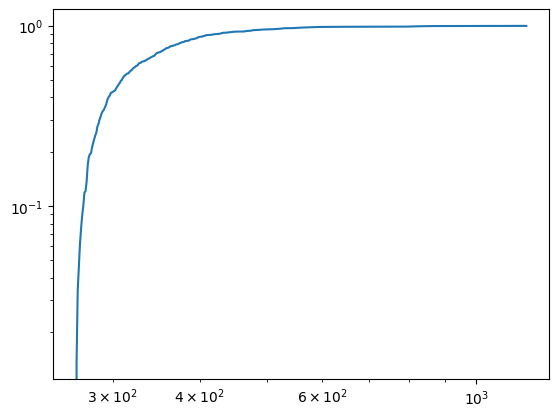

In [48]:
fit.plot_cdf()

In [55]:
x, y = fit.cdf()

(168,)

(168,)

In [10]:
dd = sorted(nk.centrality.DegreeCentrality(ucla).run().scores(), reverse=True)
fit = powerlaw.Fit(dd)
fit.alpha

Calculating best minimal value for power law fit


5.710284686923003

In [15]:
fit_bin_edges, fit_bin_proportions = fit.pdf()
fit_bin_middles = [np.mean((fit_bin_edges[i], fit_bin_edges[i+1]))
                    for i in range(len(fit_bin_edges)-1)]

In [12]:
fit_bin_edges

array([ 265.,  339.,  435.,  559.,  717.,  919., 1181.])

In [13]:
fit_bin_proportions

array([8.94730347e-03, 2.63984018e-03, 4.97127707e-04, 7.22501590e-05,
       4.52100005e-05, 8.71414131e-06])

In [14]:
fit.xmin

265.0

In [18]:
fit_bin_proportions[0] * len(fit.data)

3.9189189189189184

In [20]:
fit_bin_middles

[302.0, 387.0, 497.0, 638.0, 818.0, 1050.0]

In [29]:
x1, x2 = fit_bin_middles[0], fit_bin_middles[1]
y1 = fit_bin_proportions[0] * len(fit.data)
y2 = (x2/x1)**(-fit.alpha) * y1

Text(0.5, 0, 'degree')

Text(0, 0.5, 'number of nodes')

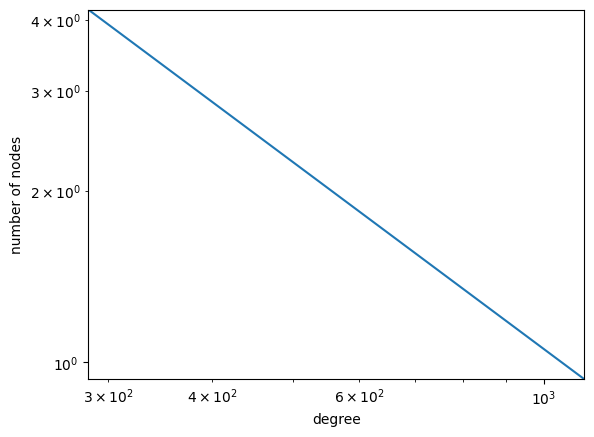

In [28]:
plt.xscale("log")
plt.xlabel("degree")
plt.yscale("log")
plt.ylabel("number of nodes")

plt.axline((302, 3.9) , (1050, 1.0))
plt.show()

In [ ]:
fit_bin_middles = [np.mean((fit_bin_edges[i], fit_bin_edges[i+1]))
                    for i in range(len(fit_bin_edges)-1)]

In [62]:
def plot_degree_dist(g, pl_fit=False, vlines=0):
    if type(g) is nk.graph.Graph:
        dd = sorted(nk.centrality.DegreeCentrality(g).run().scores(), reverse=True)
    elif type(g) is np.ndarray and np.issubdtype(g.dtype, np.integer):
        dd = sorted(g.astype(np.int64), reverse=True)
    else:
        raise Exception('g should be an nk Graph, or a np.ndarray of integers >=1')
    degrees, numberOfNodes = np.unique(dd, return_counts=True)
    # fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    plt.subplot(121)
    # plt.sca(axes[0])
    plt.xscale("log")
    plt.xlabel("degree")
    plt.yscale("log")
    plt.ylabel("number of nodes")
    # plt.scatter(degrees, numberOfNodes, s=1.1, marker='x')
    plt.plot(degrees, numberOfNodes)
    if pl_fit:
        fit = powerlaw.Fit(dd)
        xmin, xmax = fit.xmin, fit.xmax
        fit_bin_edges, fit_bin_proportions = fit.pdf()
        fit_bin_middles = [np.mean((fit_bin_edges[i], fit_bin_edges[i+1]))
                    for i in range(len(fit_bin_edges)-1)]
        plt.plot(fit_bin_middles, fit_bin_proportions * len(fit.data), linestyle='--', color='purple')
        plt.axvline(fit.xmin, linestyle='--', color='r')
        # # literal power law fit
        # x1, x2 = fit_bin_middles[0], fit_bin_middles[1]
        # y1 = fit_bin_proportions[0] * len(fit.data)
        # y2 = (x2/x1)**(-fit.alpha) * y1
        # plt.axline((x1, y1), (x2, y2), linestyle='--', color='r')
    if vlines > 0:  # plot like quartile lines for number of nodes.
        # rough q-tiles
        q = vlines
        colors = plt.cm.rainbow(np.linspace(0, 1, q))
        rev_dd = list(reversed(dd))
        for i in range(1, q):
            plt.axvline(rev_dd[i * len(dd)//q], label=f'qtile-{i}/{q}', c=colors[i])
        plt.legend()
    # plt.show()
    plt.subplot(122)

    one_minus_cdf = 1. * np.arange(len(dd)) / (len(dd) - 1)
    plt.xscale("log")
    plt.xlabel("degree")
    plt.yscale("log")
    plt.ylabel("1 - CDF")
    plt.plot(dd, one_minus_cdf)
    
    if pl_fit:
        x, y = fit.cdf()
        perc = len(fit.data)/len(fit.data_original)
        y2 = y2 = perc *(1 - y)
        plt.plot(x, y2, linestyle='--', color='purple')
        plt.axvline(fit.xmin, linestyle='--', color='r')


    if vlines > 0:  # plot like quartile lines for number of nodes.
        # rough q-tiles
        q = vlines
        colors = plt.cm.rainbow(np.linspace(0, 1, q))
        rev_dd = list(reversed(dd))
        for i in range(1, q):
            plt.axvline(rev_dd[i * len(dd)//q], label=f'qtile-{i}/{q}', c=colors[i])
        plt.legend()

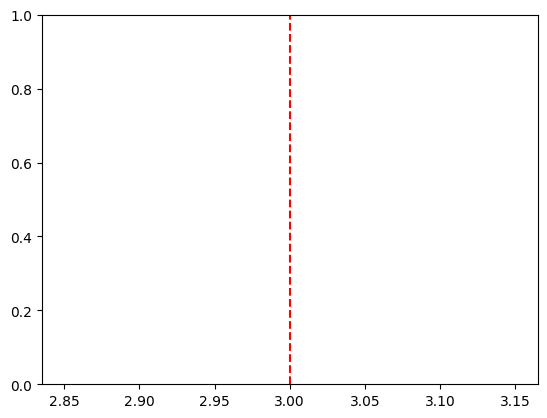

In [42]:
plt.axvline(3, linestyle='--', color='r')

In [98]:
def plot_degree_dist(g, pl_fit=False, vlines=0):
    if type(g) is nk.graph.Graph:
        dd = sorted(nk.centrality.DegreeCentrality(g).run().scores(), reverse=True)
    elif type(g) is np.ndarray and np.issubdtype(g.dtype, np.integer):
        dd = sorted(g.astype(np.int64), reverse=True)
    else:
        raise Exception('g should be an nk Graph, or a np.ndarray of integers >=1')
    degrees, numberOfNodes = np.unique(dd, return_counts=True)
    # fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    plt.subplot(121)
    # plt.sca(axes[0])
    plt.xscale("log")
    plt.xlabel("degree")
    plt.yscale("log")
    plt.ylabel("number of nodes")
    # plt.scatter(degrees, numberOfNodes, s=1.1, marker='x')
    plt.plot(degrees, numberOfNodes)
    if pl_fit:
        fit = powerlaw.Fit(dd)
        # xmin, xmax = fit.xmin, fit.xmax
        # fit_bin_edges, fit_bin_proportions = fit.pdf()
        # fit_bin_middles = [np.mean((fit_bin_edges[i], fit_bin_edges[i+1]))
        #             for i in range(len(fit_bin_edges)-1)]
        # plt.plot(fit_bin_middles, fit_bin_proportions * len(fit.data), linestyle='--', color='purple')
        fit.power_law.plot_pdf(linestyle='--', color='purple')
        plt.axvline(fit.xmin, linestyle='--', color='r')
        # # literal power law fit
        # x1, x2 = fit_bin_middles[0], fit_bin_middles[1]
        # y1 = fit_bin_proportions[0] * len(fit.data)
        # y2 = (x2/x1)**(-fit.alpha) * y1
        # plt.axline((x1, y1), (x2, y2), linestyle='--', color='r')
    if vlines > 0:  # plot like quartile lines for number of nodes.
        # rough q-tiles
        q = vlines
        colors = plt.cm.rainbow(np.linspace(0, 1, q))
        rev_dd = list(reversed(dd))
        for i in range(1, q):
            plt.axvline(rev_dd[i * len(dd)//q], label=f'qtile-{i}/{q}', c=colors[i])
        plt.legend()
    # plt.show()
    plt.subplot(122)

    one_minus_cdf = 1. * np.arange(len(dd)) / (len(dd) - 1)
    plt.xscale("log")
    plt.xlabel("degree")
    plt.yscale("log")
    plt.ylabel("1 - CDF")
    plt.plot(dd, one_minus_cdf)
    
    if pl_fit:
        x, y = fit.cdf()
        perc = len(fit.data)/len(fit.data_original)
        y2 = y2 = perc *(1 - y)
        plt.plot(x, y2, linestyle='--', color='purple')
        plt.axvline(fit.xmin, linestyle='--', color='r')


    if vlines > 0:  # plot like quartile lines for number of nodes.
        # rough q-tiles
        q = vlines
        colors = plt.cm.rainbow(np.linspace(0, 1, q))
        rev_dd = list(reversed(dd))
        for i in range(1, q):
            plt.axvline(rev_dd[i * len(dd)//q], label=f'qtile-{i}/{q}', c=colors[i])
        plt.legend()

Calculating best minimal value for power law fit


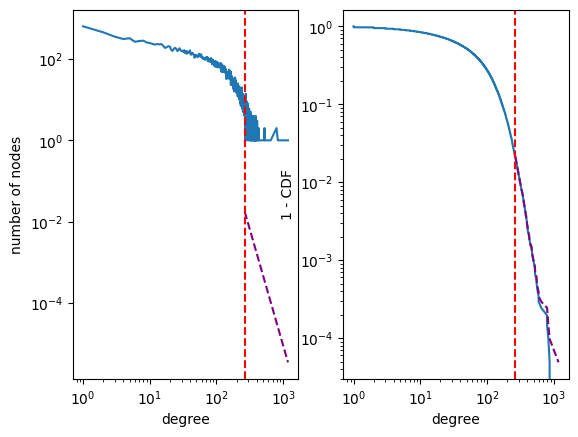

In [99]:
plot_degree_dist(ucla, pl_fit=True)